In [1]:
from statsmodels.tsa.stattools import adfuller
import statsmodels.tsa.stattools as st
from statsmodels.tsa.arima_model import ARIMA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import matplotlib
import warnings

D:\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
warnings.filterwarnings('ignore')
matplotlib.rcParams['font.family'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False 
matplotlib.rcParams['backend'] = 'SVG'

# 比特币预测参数的选择

In [3]:
df = pd.read_excel('表.xlsx',index_col=0)
df.head()

,Date,USD (PM),Value,DealDay,黄金涨幅(%),比特币涨幅(%),黄金5日均价,黄金5日乖离率,比特币5日均价,比特币5日乖离率,...,黄金涨幅的前90日均值,黄金5日乖离率的前90日均值,黄金牛市,gold_cow,比特币涨幅的前30日均值,比特币5日乖离率的前30日均值,比特币牛市,bt_cow,黄金购买风险,比特币购买风险
0,2016-09-11,0.00,621.65,0,0.493311,0.641569,0.0,0.460623,0.000000,0.550392,...,NaN,NaN,0.494444,-1,NaN,NaN,0.483333,-1,0.492608,0.485020
1,2016-09-12,1324.60,609.67,1,0.493311,0.609981,0.0,0.460623,0.000000,0.550392,...,NaN,NaN,0.488889,-2,NaN,NaN,0.466667,-2,0.487354,0.468772
2,2016-09-13,1323.65,610.92,1,0.486412,0.644930,0.0,0.460623,0.000000,0.550392,...,NaN,NaN,0.483333,-3,NaN,NaN,0.450000,-3,0.482100,0.452525
3,2016-09-14,1321.75,608.82,1,0.479503,0.635935,0.0,0.460623,0.000000,0.550392,...,NaN,NaN,0.477778,-4,NaN,NaN,0.433333,-4,0.476846,0.436278
4,2016-09-15,1310.80,610.38,1,0.413621,0.645769,0.0,0.460623,0.009834,0.545356,...,NaN,NaN,0.472222,-5,NaN,NaN,0.416667,-5,0.471592,0.419903


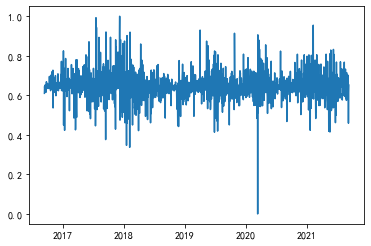

In [4]:
plt.plot(df['Date'][1:],df['比特币涨幅(%)'][1:])
#plt.savefig('比特币涨幅走势图.png')
plt.show()

In [5]:
#data = df['黄金涨幅(%)'][df['DealDay']==1].copy()
data = df['比特币涨幅(%)'][1:].copy()
data_diff=data
#data_diff.index=df['Date'][df['DealDay']==1].copy()
data_diff.index=df['Date'][1:].copy()
data_diff=data_diff.diff(1).dropna()
diff_df = pd.DataFrame()
diff_df['diff_1'] =  data_diff
diff_df['diff_2'] = data_diff.diff(1).dropna()
diff_df['diff_3'] = diff_df['diff_2'].diff(1).dropna()

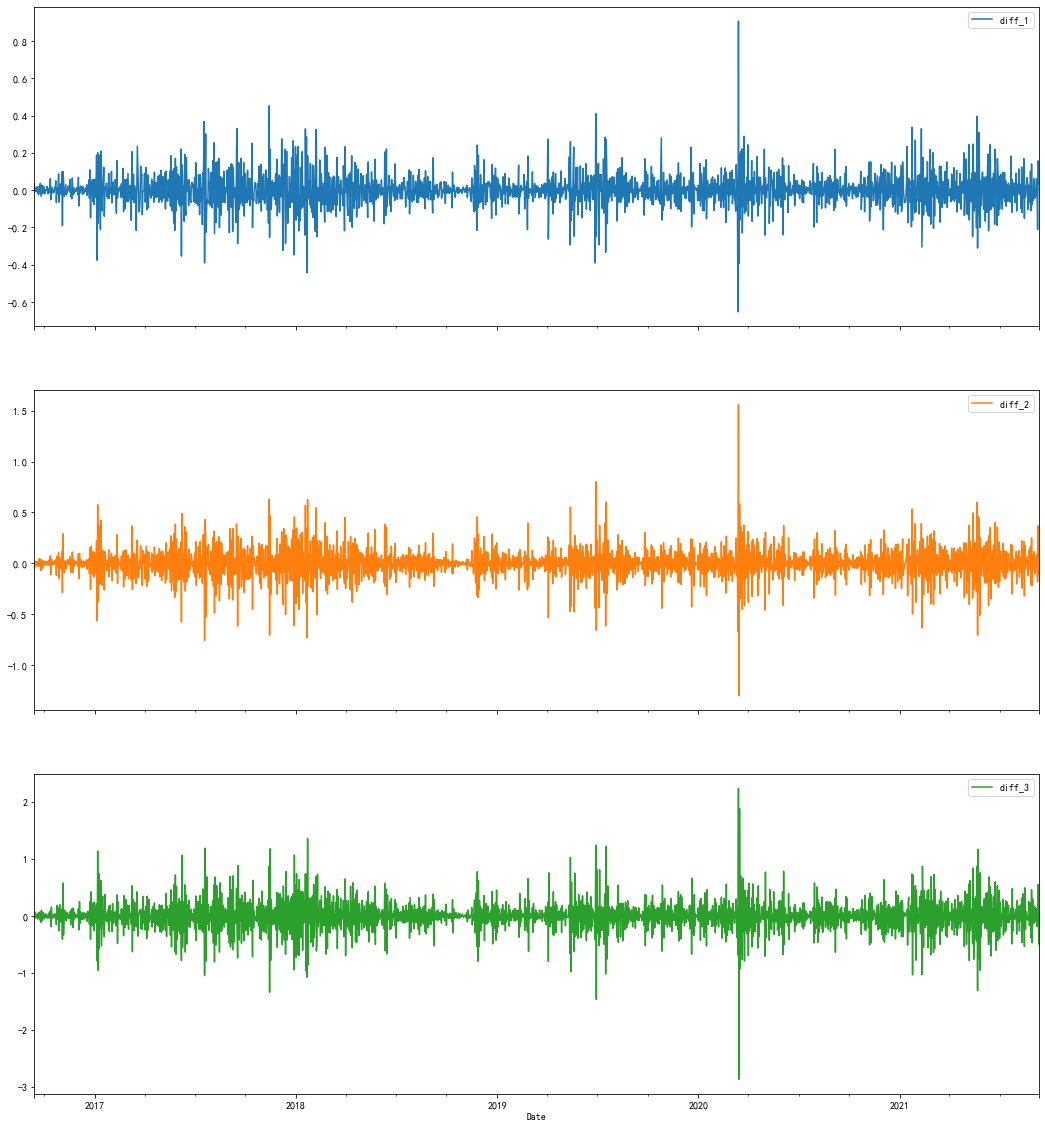

In [6]:
diff_df.plot(subplots=True,figsize=(18,20))
#plt.savefig('比特币涨幅差分对比图.png')
plt.show()
# 对比选择几阶差分,肉眼观察数据平稳性

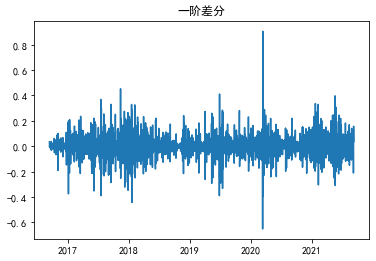

In [7]:
plt.plot(data_diff)
plt.title('一阶差分')
#plt.savefig('比特币涨幅一阶差分图.png')
plt.show()

adfuller单位根检验数据平稳性  
输出结果中：  
第一个是adt检验的结果，简称为T值，表示t统计量。  
第二个简称为p值，表示t统计量对应的概率值。  
第三个表示延迟。  
第四个表示测试的次数。  
第五个是配合第一个一起看的，是在99%，95%，90%置信区间下的临界的ADF检验的值。  

第一点，1%、5%、10%不同程度拒绝原假设的统计值和ADF Test result的比较，ADF Test result同时小于1%、5%、10%即说明非常好地拒绝该假设。  
第二点，p值要求小于给定的显著水平，p值要小于0.05，等于0是最好的。
ADF检验的原假设是存在单位根，只要这个统计值是小于1%水平下的数字就可以极显著的拒绝原假设，认为数据平稳。注意，ADF值一般是负的，也有正的，但是它只有小于1%水平下的才能认为是及其显著的拒绝原假设。  
（原假设为不是平稳时间序列)

In [8]:
from statsmodels.tsa.stattools import adfuller
print(adfuller(data))  # 原始数据
print(adfuller(diff_df['diff_1'].dropna()))  # 一阶差分
print(adfuller(diff_df['diff_2'].dropna()))  # 二阶差分
print(adfuller(diff_df['diff_3'].dropna()))  # 三阶差分

(-12.223305571503358, 1.0947582120674342e-22, 9, 1815, {'1%': -3.4339580289794225, '5%': -2.8631337437669275, '10%': -2.567618456010139}, -4541.821412010771)
(-13.82929053130919, 7.645431948922473e-26, 25, 1798, {'1%': -3.4339921916016345, '5%': -2.8631488249300574, '10%': -2.5676264862577503}, -4464.667072766617)
(-18.468328427027746, 2.1417120306328765e-30, 25, 1797, {'1%': -3.4339942213257535, '5%': -2.8631497209507284, '10%': -2.567626963361616}, -4289.005309932067)
(-21.73972763043247, 0.0, 25, 1796, {'1%': -3.433996253313391, '5%': -2.863150617970021, '10%': -2.5676274409973163}, -3982.9721923283105)


原始数据的P值<0.05所以满足平稳性要求  
一阶差分的P值<0.05，且T值小于1%，5%，10%下的统计值，可以极显著的拒绝原假设，说明数据是平稳的。  
一阶差分数据已经平稳就无需继续做二阶差分了。  

In [9]:
from statsmodels.stats.diagnostic import acorr_ljungbox
acorr_ljungbox(data, lags = 20)

(array([ 2.27460977,  4.6082518 ,  5.66041301,  8.49706634,  8.90578569,
        10.50288534, 10.61524107, 12.6235282 , 14.09636301, 21.1454631 ,
        22.17377471, 22.23535499, 22.44406944, 22.63998452, 25.26864248,
        26.0529463 , 26.5600866 , 29.11831914, 29.16063587, 30.86860331]),
 array([0.13150822, 0.09984604, 0.12935282, 0.0749762 , 0.11288157,
        0.10501007, 0.15630478, 0.12547607, 0.11893846, 0.02010177,
        0.02306102, 0.03496516, 0.04885177, 0.06638587, 0.04644988,
        0.05328779, 0.06484302, 0.04695207, 0.06350004, 0.05694918]))

acorr_ljungbox输出结果的第二项为基于卡方分布的p统计量，一阶差分的P值都很小，所以该数据拒绝原假设，即认为该数据不是纯随机数据  
不是纯随机数才可以做时间序列分析

# 观察法选择p,q
|模型|ACF|PACF|
|-|-|-|
|AR(p)|衰减趋于零(几何型或振荡型)|p阶后截尾|
|MA(q)|q阶后截尾|衰减趋于零(几何型或振荡型)|
|ARMA(p,q)|q阶后衰减趋于零(几何型或振荡型)|p阶后衰减趋于零(几何型或振荡型)|

截尾:落在置信区间内( 95%的点都符合该规则)

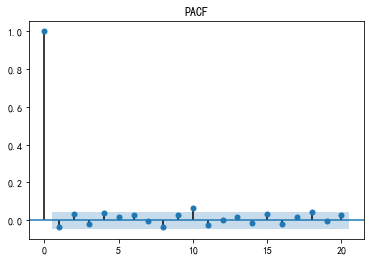

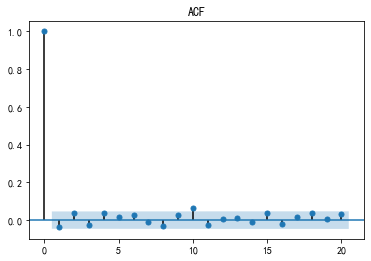

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
pacf = plot_pacf(data, lags=20)
plt.title('PACF')
plt.savefig('E:/论文/论文2/论文图片/比特币涨幅PACF图.svg',format='svg')
pacf.show()

acf = plot_acf(data, lags=20)
plt.title('ACF')
plt.savefig('E:/论文/论文2/论文图片/比特币涨幅ACF图.svg',format='svg')
acf.show()

# 穷举法选择最好的p,q
max_ar和max_ma为最大可取参数，数值较大时运行结果较长。建议为5

In [11]:
#import statsmodels.tsa.stattools as st
#model = st.arma_order_select_ic(data_diff, max_ar=20, max_ma=20, ic=['aic', 'bic', 'hqic'])
#model.bic_min_order 
# 结果为(p,q)

训练ARIMA模型  
order参数里的三个值分别为（p,d阶差分,q）  
对于使用穷举法得出结果为0,0,且绘制出的图形效果较差时，可以根据肉眼观察图主动选择

In [12]:
#from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm

In [13]:
for p in [i for i in range(9,21)]:
    for q in [1]:
        model = SARIMAX(data, order=(p,0,q))
        result = model.fit()
        resid = result.resid
        print('p:',p, '\tq:',q, '\taic:',result.aic, '\tbic:',result.bic,
             '\tDW:',sm.stats.durbin_watson(resid.values))

p: 9 	q: 1 	aic: -4504.46712150219 	bic: -4443.864433576007 	DW: 2.0212751663501978
p: 10 	q: 1 	aic: -4497.992432691746 	bic: -4431.880409499547 	DW: 1.940860339877243
p: 11 	q: 1 	aic: -4498.338730848152 	bic: -4426.717372389937 	DW: 1.907759349028336
p: 12 	q: 1 	aic: -4506.628422996693 	bic: -4429.497729272461 	DW: 1.9455686411460904
p: 13 	q: 1 	aic: -4512.648283266048 	bic: -4430.008254275799 	DW: 1.9431117399185291
p: 14 	q: 1 	aic: -4515.299214550039 	bic: -4427.149850293774 	DW: 1.9443892804927685
p: 15 	q: 1 	aic: -4525.8807494023295 	bic: -4432.222049880047 	DW: 1.9437817098027168
p: 16 	q: 1 	aic: -4525.230532190932 	bic: -4426.062497402633 	DW: 1.94446613618761
p: 17 	q: 1 	aic: -4536.491298019618 	bic: -4431.813927965302 	DW: 1.9520137686563501
p: 18 	q: 1 	aic: -4543.19021853163 	bic: -4433.003513211299 	DW: 1.9487914995324882
p: 19 	q: 1 	aic: -4542.062341981746 	bic: -4426.366301395397 	DW: 1.949669439196123
p: 20 	q: 1 	aic: -4546.249953754452 	bic: -4425.044577902086

In [14]:
model = SARIMAX(data, order=(10,0,10))
result = model.fit()

残差检验  
如果残差是白噪声序列，说明时间序列中有用的信息已经被提取完毕了，剩下的全是随机扰动，是无法预测和使用的。  
qq图中：如果是正态分布则为一条直线，即红线。结果大致符合白噪声

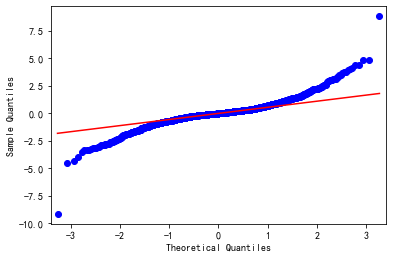

In [15]:
resid = result.resid
from statsmodels.graphics.api import qqplot
qqplot(resid, line='q', fit=True)
#plt.savefig('比特币涨幅arima残差QQ图.png')
plt.show()

Durbin-Watson 检验，又称 DW 检验，是用来检验回归分析中残差的一阶自相关性的(尤其针对时间序列数据)。  
该统计量值越接近 2 越好，一般在 1~3 之间说明没问题，小于 1 这说明残差存在自相关性

In [16]:
print(sm.stats.durbin_watson(resid.values))

1.9510343748465981


In [17]:
# result.summary()

预测  
predict(起始时间，终止时间)，预测出的结果为比特币的价格

In [18]:
pred = result.predict('2016-09-20','2021-9-10')
# pred = result.predict(1,1655)
print(len(pred))
print(pred[-10:])

1817
2021-09-01    0.656677
2021-09-02    0.650972
2021-09-03    0.645816
2021-09-04    0.641975
2021-09-05    0.638090
2021-09-06    0.641529
2021-09-07    0.655045
2021-09-08    0.654801
2021-09-09    0.651810
2021-09-10    0.640810
Freq: D, dtype: float64


In [19]:
"""plt.figure(figsize=(6, 6))
plt.xticks(rotation=45)
# plt.plot(data_diff)
plt.plot(pred)
#plt.savefig('比特币预测涨幅.png')
plt.show()"""

"plt.figure(figsize=(6, 6))\nplt.xticks(rotation=45)\n# plt.plot(data_diff)\nplt.plot(pred)\n#plt.savefig('比特币预测涨幅.png')\nplt.show()"

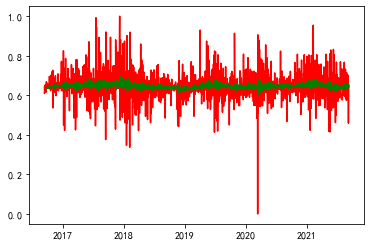

In [20]:
plt.plot(data,c='r')
plt.plot(pred,c='g')
plt.savefig('E:/论文/论文2/论文图片/比特币涨幅对比图.svg',format='svg')
plt.show()

虽然大幅涨势没有预测出来但是整体的峰值基本还是预测出来了。  
这里仅介绍了参数的选择，比特币同理，后续使用预测时不进行解释。这里预测结果仅为示意图，后续不需要使用，每一个使用的数据都是刚预测出来的。

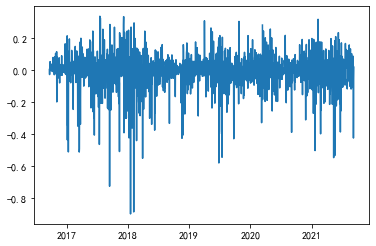

In [21]:
plt.plot((data-pred)/data)
plt.show()

In [22]:
# data = df['比特币涨幅(%)'].copy()
# data_diff=data
# data_diff.index=df['Date'].copy()
# data_diff=data_diff.diff().dropna()
# model = st.arma_order_select_ic(data_diff, max_ar=5, max_ma=5, ic=['aic', 'bic', 'hqic'])
# model.bic_min_order 

# model = ARIMA(data, order=(2,1,2))
# result = model.fit()
# pred = result.predict(2,1836)
# print(len(pred))
# print(pred[-10:])
# result_fina = np.array(pred[0:-10]) + (np.array(df['比特币涨幅(%)'].shift(1)[:-1]))